In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, NMF, MiniBatchSparsePCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

In [2]:
df = pd.read_pickle('FT-data-DSpace/data_agreggated.pickle')
df = df[['Date', 'Meeting Number', 'Clean']]

In [3]:
df['Sentences'] = df['Clean'].apply(lambda x: ' '.join(x))
df['Date'] = pd.to_datetime(df['Date'])
df.sample(2)

,Date,Meeting Number,Clean,Sentences
634,2015-05-12 13:00:00,90. møde,"[mød, åbn, så, går, anmeld, beskæftigelsesmini...",mød åbn så går anmeld beskæftigelsesminist hen...
96,2010-05-26 13:00:00,97. møde,"[mød, åbn, dag, enkelt, anmeld, indenr, sundhe...",mød åbn dag enkelt anmeld indenr sundhedsminis...


In [13]:
#tvec = TfidfVectorizer(min_df=.01, max_df=1.0, sublinear_tf=True, analyzer='word', ngram_range=(1,2), max_features=20000)
tvec = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features=20000)
x = tvec.fit_transform(df['Sentences'])

words = tvec.get_feature_names()

In [14]:
df_x = pd.DataFrame(columns= words, data=x.toarray())
df_x['Date'] = df['Date']
df_x['Year'] = df_x['Date'].dt.year
df_x['Meeting'] = df['Meeting Number']
df_x.sample(2)

,3f,aaen,aaen enhedslist,aaen ikk,aaen kort,aaen ordfør,aaja,aaja chemnitz,aalborg,aalborg portland,...,øvr ikk,øvr kan,øvr meg,øvr ordfør,øvr parti,øvr så,øvr vær,Date,Year,Meeting
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.002911,0.0,0.0,0.0,0.0,0.0,2013-11-05 13:00:00,2013,13. møde
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001315,0.0,...,0.001177,0.001580,0.0,0.0,0.0,0.0,0.0,2011-03-22 13:00:00,2011,70. møde


### PCA

In [15]:
#pca = MiniBatchSparsePCA(n_components=500,alpha = 1e-3, n_jobs=4, batch_size=15) #normal PCA does not work
pca = KernelPCA(n_components=500, kernel='rbf', alpha=1e-10, fit_inverse_transform=True, max_iter=1000)
pca_result = pca.fit_transform(df_x[words].values)
df_x['pca-one'] = pca_result[:,0]
df_x['pca-two'] = pca_result[:,1] 
df_x['pca-three'] = pca_result[:,2]
#print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [19]:
k = 3
kmeans = KMeans(n_clusters=k).fit(pca_result)
df_x['label'] = kmeans.labels_

In [20]:
df_x.sample(10)

,3f,aaen,aaen enhedslist,aaen ikk,aaen kort,aaen ordfør,aaja,aaja chemnitz,aalborg,aalborg portland,...,øvr parti,øvr så,øvr vær,Date,Year,Meeting,pca-one,pca-two,pca-three,label
510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000993,0.0,...,0.000000,0.001431,0.001232,2014-04-10 10:00:00,2014,75. møde,-1.137569e-03,-0.001039,-0.000083,2
182,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000955,0.000000,0.000000,2011-03-31 10:00:00,2011,74. møde,-1.100772e-03,-0.000335,-0.000153,2
797,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,2016-12-15 10:00:00,2016,37. møde,7.924952e-08,-0.000403,0.001615,2
421,0.007036,0.004896,0.001161,0.001215,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.001082,0.000000,2013-05-23 10:00:00,2013,101. møde,-7.089042e-04,-0.001160,0.000870,2
776,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,2016-11-15 13:00:00,2016,16. møde,5.079876e-04,-0.000671,-0.000744,2
385,0.000000,0.005654,0.001787,0.001871,0.0,0.0,0.0,0.0,0.000578,0.0,...,0.001291,0.001666,0.000717,2013-02-28 10:00:00,2013,65. møde,-1.411050e-03,-0.000125,0.000200,2
511,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,2014-04-11 10:00:00,2014,76. møde,-4.132006e-04,-0.000942,-0.001219,2
365,0.000000,0.012313,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,2013-01-16 13:00:00,2013,45. møde,-1.153169e-03,0.001769,0.000492,0
538,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,2014-08-27 17:00:00,2014,103. møde,5.263256e-03,-0.000221,0.001234,1
664,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000820,0.001057,0.000000,2015-11-12 10:00:00,2015,16. møde,-4.855109e-04,-0.000886,0.000187,2


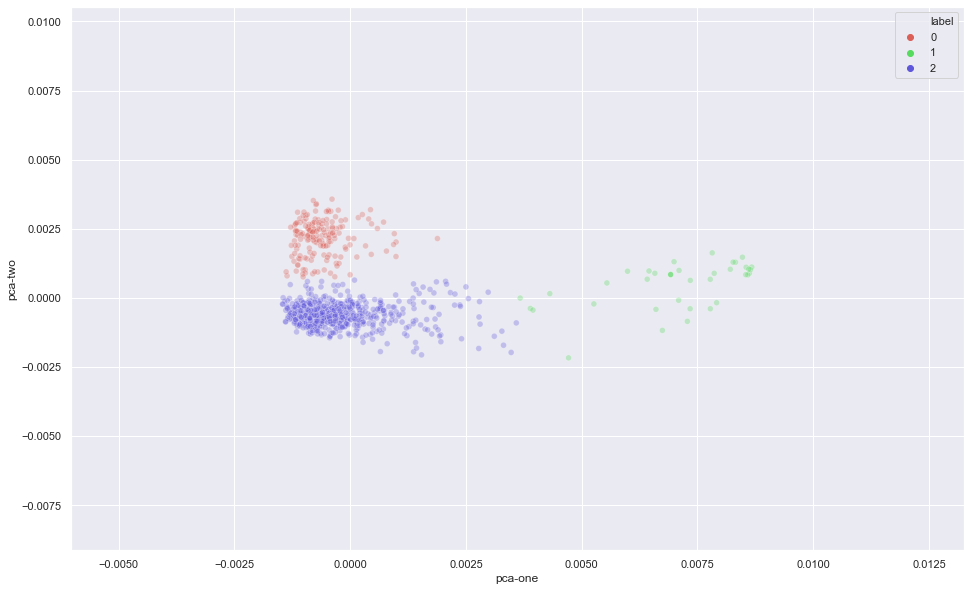

In [21]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='label',
    palette=sns.color_palette("hls", k),
    data=df_x,
    legend="full",
    alpha=0.3
)

#### T-SNE

In [22]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(df_x[words])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 863 samples in 2.522s...
[t-SNE] Computed neighbors for 863 samples in 22.387s...
[t-SNE] Computed conditional probabilities for sample 863 / 863
[t-SNE] Mean sigma: 0.191954
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.313400
[t-SNE] KL divergence after 1000 iterations: 1.044266
t-SNE done! Time elapsed: 37.07485485076904 seconds


In [23]:
df_x['tsne_component_one'] = tsne_results[:,0]
df_x['tsne_component_two'] = tsne_results[:,1]

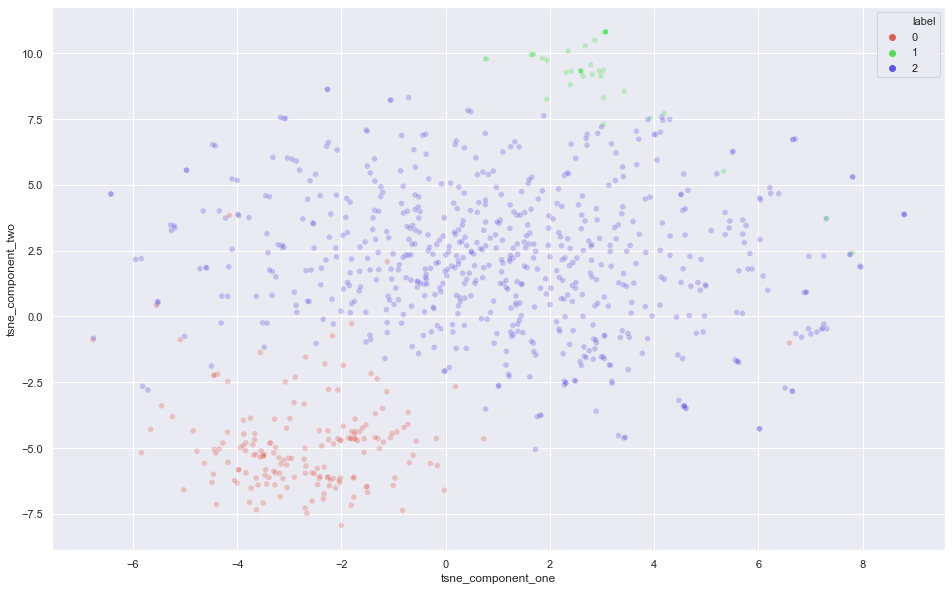

In [24]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_component_one", y="tsne_component_two",
    hue='label',
    palette=sns.color_palette("hls", k),
    data=df_x,
    legend="full",
    alpha=0.3
)

In [ ]:
df_x